In [1]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
from dataloader import *
from plotters import *
import torch

In [90]:
dir_data = r'D:\Data\cs-8395-dl\assignment3\Training'
fileIDs = ['0001','0002']

# aug = Compose([
#     HorizontalFlip(),
#     RandomBrightnessContrast(
#         brightness_limit=[-0.2, 0.2],
#         contrast_limit=[-0.2, 0.2],
#     ),
#     CenterCrop(256,256,p=0.5),
#     Resize(256, 256),
#     Normalize(),
#     albu_torch.ToTensorV2()
# ],
# )

BATCH_SIZE = 8
dataset = Spleen_Dataset(dir_data=dir_data,
                       fileIDs=fileIDs,
                         axis = 'axial',
                         # to_ram=True,
                         transform = ['organ_mask']
                       )

sample = dataset[1] # get patient

batch_start_range = range(0, sample[0].shape[-3], BATCH_SIZE)
batch_start_range = np.array(list(batch_start_range))[-3:]
# np.random.shuffle(batch_start_range) # randomize batch start index

0it [00:00, ?it/s]

tensor([1, 1, 1, 1, 1, 1, 0, 0])


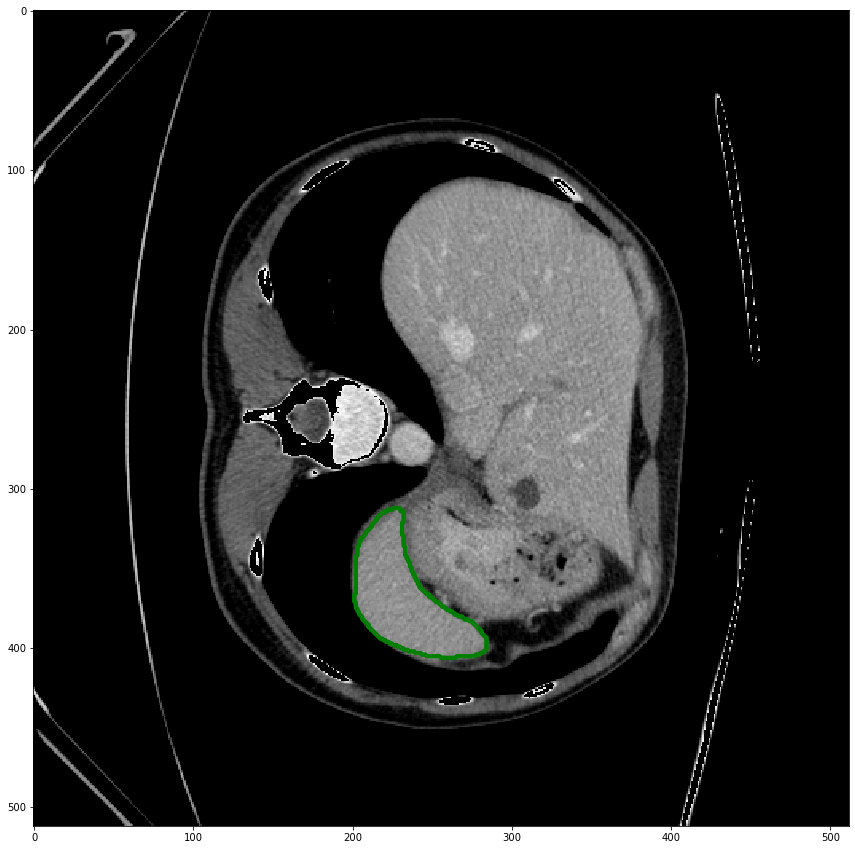

In [91]:
sample = dataset[1] # get patient

batch_start_range = range(0, sample[0].shape[-3], BATCH_SIZE)
batch_start_range = np.array(list(batch_start_range))[-3:]
# np.random.shuffle(batch_start_range) # randomize batch start index
for i_b, batch_start in tqdm(enumerate(batch_start_range)):
        # sample[0] dim [147, 512, 512], sample[1] [147, 512, 512]
        image_batch = sample[0][batch_start:batch_start + BATCH_SIZE, :, :]
        mask_batch = sample[1][batch_start:batch_start + BATCH_SIZE, :, :]

#         if np.random.randn() > 0.5:
#             inds_sample = np.arange(image_batch.shape[0])
#             subset = np.random.choice(inds_sample, len(inds_sample) // 2)
#             for ind in subset:
#                 image_batch[ind][mask_batch[ind] == 1] = 0
#                 mask_batch[ind][mask_batch[ind] == 1] = 0

        image_batch = torch.cat(3 * [image_batch.unsqueeze(1)], dim=1)

        image_batch = image_batch
        target_batch = ((torch.sum(mask_batch, dim=(1, 2)) > 0) * 1)
        target_batch = target_batch
        # print(target_batch)
        
        print(target_batch)
        # plot
        image_3d_rec, mask_3d_rec = recon_img_mask(image_batch, mask_batch)
#         _, output_3d_rec = recon_img_mask(image_batch, output)
#         plot_heatmap(image_3d_rec, output_3d_rec,
#                      range(0, output_3d_rec.shape[0], 2))
#         output_3d_rec_bin = (output_3d_rec > output_3d_rec.max() / 2) * 1
#         print('out_max',output_3d_rec_bin.max())
        plot_outline(image_3d_rec, mask_3d_rec,None,
                     0)
        break